In [1]:
import seaborn as sns

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%ls datasets/

adult.csv                              data.csv
airline_data.csv                       headbrain.csv
antropometria00.csv                    mic2.xlsx
antropometria-dataset.csv              mic.xlsx
Book3.csv                              movies.csv
Canada.xlsx                            nhanes_2015_2016.csv
Cartwheeldata.csv                      pokemon.csv
Casos-positivos-diarios-en-Mexico.csv  sample_pivot.csv
census.csv                             tips.csv
coches.csv                             weight-height.csv
cwurData.csv


In [5]:
df = pd.read_csv('datasets/antropometria-dataset.csv')
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


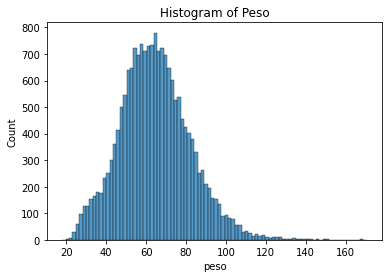

In [6]:
sns.histplot(df["peso"], 
             kde = False).set_title("Histogram of Peso")

# kernel density estimation  KDE

plt.show()

Text(0.5, 1.0, 'Box plot of cintura')

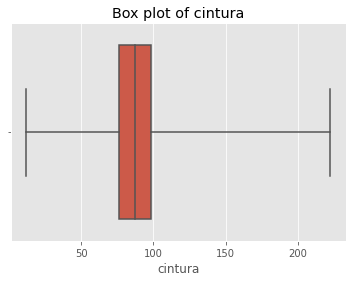

In [65]:
sns.boxplot(x = df["cintura"], 
            whis=(0, 100)).set_title("Box plot of cintura")

In [8]:
df['sexo']

0        2
1        2
2        2
3        1
4        2
        ..
18635    2
18636    2
18637    1
18638    2
18639    2
Name: sexo, Length: 18640, dtype: int64

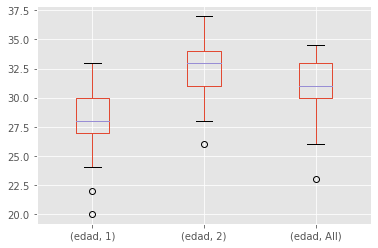

In [56]:
my_pivot = pd.pivot_table(df,
                        index = ['desc_ent'],
                        values = ['peso'],
                        #aggfunc = ['std','sum','mean','median'],
                        aggfunc = 'median',
                        columns = 'sexo',
                        margins = True
                         )
            
my_pivot.boxplot()

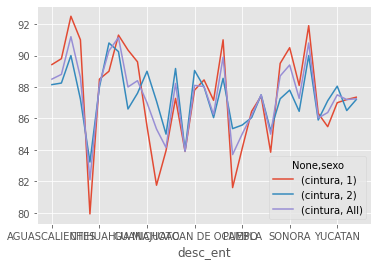

In [76]:
my_pivot = pd.pivot_table(df,
                        index = ['desc_ent'],
                        values = ['cintura'],
                        #aggfunc = ['std','sum','mean','median'],
                        aggfunc = 'median',
                        columns = 'sexo',
                        margins = True
                         )
            
my_pivot.plot()

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
my_pivot = pd.pivot_table(df,
                        index = ['desc_ent'],
                        values = ['sistol'],
                        #aggfunc = ['std','sum','mean','median'],
                        aggfunc = 'sum',
                        columns = 'sexo',
                        margins = True,
                         )
            
my_pivot

sistol                        
sexo                                     1           2         All
desc_ent                                                          
AGUASCALIENTES                    37608.00    42565.25    80173.25
BAJA CALIFORNIA                   32240.00    35515.50    67755.50
BAJA CALIFORNIA SUR               32076.00    31207.00    63283.00
CAMPECHE                          28854.50    35136.25    63990.75
CHIAPAS                           28550.00    40385.50    68935.50
CHIHUAHUA                         32073.75    37742.75    69816.50
COAHUILA DE ZARAGOZA              36171.25    36969.25    73140.50
COLIMA                            30854.75    38381.25    69236.00
DISTRITO FEDERAL                  20036.00    24548.25    44584.25
DURANGO                           31436.75    39155.50    70592.25
GUANAJUATO                        34864.00    44234.50    79098.50
GUERRERO                          31312.00    43056.75    74368.75
HIDALGO                           22626.00    38481.25    61107.25
JALISCO                           26649.25    36332.25    62981.50
MEXICO                            21846.75    29587.00    51433.75
MICHOACAN DE OCAMPO               31250.25    40552.75    71803.00
MORELOS                           24613.25    39654.75    64268.00
NAYARIT                           28150.00    37780.50    65930.50
NUEVO LEON                        36323.75    42691.75    79015.50
OAXACA                            28216.00    41181.25    69397.25
PUEBLA                            24896.00    33540.50    58436.50
QUERETARO                         35482.00    40666.75    76148.75
QUINTANA ROO                      30163.25    38685.00    68848.25
SAN LUIS POTOSI                   38773.50    49254.75    88028.25
SINALOA                           27309.50    33102.25    60411.75
SONORA                            34541.75    37444.25    71986.00
TABASCO                           33531.75    37113.50    70645.25
TAMAULIPAS                        35698.50    39121.50    74820.00
TLAXCALA                          26645.25    36958.50    63603.75
VERACRUZ DE IGNACIO DE LA LLAVE   36108.75    49827.50    85936.25
YUCATAN                           28870.75    39351.50    68222.25
ZACATECAS                         31597.00    38755.00    70352.00
All                              979370.25  1228980.25  2208350.50

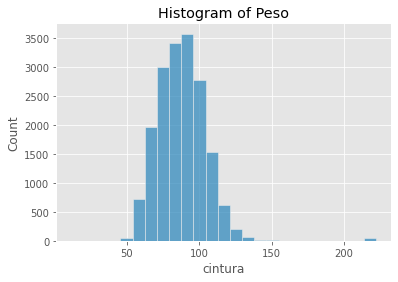

In [83]:
sns.histplot(df["cintura"], 
             kde = False, bins = 25).set_title("Histogram of Peso")

# kernel density estimation  KDE

plt.show()

In [84]:
my_pivot.columns

MultiIndex([('sistol',     1),
            ('sistol',     2),
            ('sistol', 'All')],
           names=[None, 'sexo'])

In [89]:
my_pivotcompl =my_pivot.sort_values(by =[( 'sistol', 1)],
                           ascending = False, #
                           axis = 0)
my_pivotcompl

sistol                        
sexo                                     1           2         All
desc_ent                                                          
All                              979370.25  1228980.25  2208350.50
SAN LUIS POTOSI                   38773.50    49254.75    88028.25
AGUASCALIENTES                    37608.00    42565.25    80173.25
NUEVO LEON                        36323.75    42691.75    79015.50
COAHUILA DE ZARAGOZA              36171.25    36969.25    73140.50
VERACRUZ DE IGNACIO DE LA LLAVE   36108.75    49827.50    85936.25
TAMAULIPAS                        35698.50    39121.50    74820.00
QUERETARO                         35482.00    40666.75    76148.75
GUANAJUATO                        34864.00    44234.50    79098.50
SONORA                            34541.75    37444.25    71986.00
TABASCO                           33531.75    37113.50    70645.25
BAJA CALIFORNIA                   32240.00    35515.50    67755.50
BAJA CALIFORNIA SUR               32076.00    31207.00    63283.00
CHIHUAHUA                         32073.75    37742.75    69816.50
ZACATECAS                         31597.00    38755.00    70352.00
DURANGO                           31436.75    39155.50    70592.25
GUERRERO                          31312.00    43056.75    74368.75
MICHOACAN DE OCAMPO               31250.25    40552.75    71803.00
COLIMA                            30854.75    38381.25    69236.00
QUINTANA ROO                      30163.25    38685.00    68848.25
YUCATAN                           28870.75    39351.50    68222.25
CAMPECHE                          28854.50    35136.25    63990.75
CHIAPAS                           28550.00    40385.50    68935.50
OAXACA                            28216.00    41181.25    69397.25
NAYARIT                           28150.00    37780.50    65930.50
SINALOA                           27309.50    33102.25    60411.75
JALISCO                           26649.25    36332.25    62981.50
TLAXCALA                          26645.25    36958.50    63603.75
PUEBLA                            24896.00    33540.50    58436.50
MORELOS                           24613.25    39654.75    64268.00
HIDALGO                           22626.00    38481.25    61107.25
MEXICO                            21846.75    29587.00    51433.75
DISTRITO FEDERAL                  20036.00    24548.25    44584.25

In [90]:
my_pivotcomplN=my_pivotcompl.head(11)
my_pivotcompl=my_pivotcompl.drop(['All'],
                             axis= 0)

In [91]:
my_pivotcompl=my_pivotcompl.head(11)

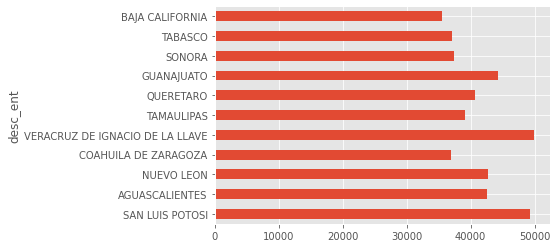

In [88]:
my_pivotcompl['sistol',     2].plot(kind='barh')